## Demo Linear regression + Qlearning

In [27]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib, os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import joblib, pathlib

### Linear regression tr√™n t·ª´ng c·ª•m


=== C·ª•m 0 ‚Äì cluster0.csv ===
   MSE = 0.3727


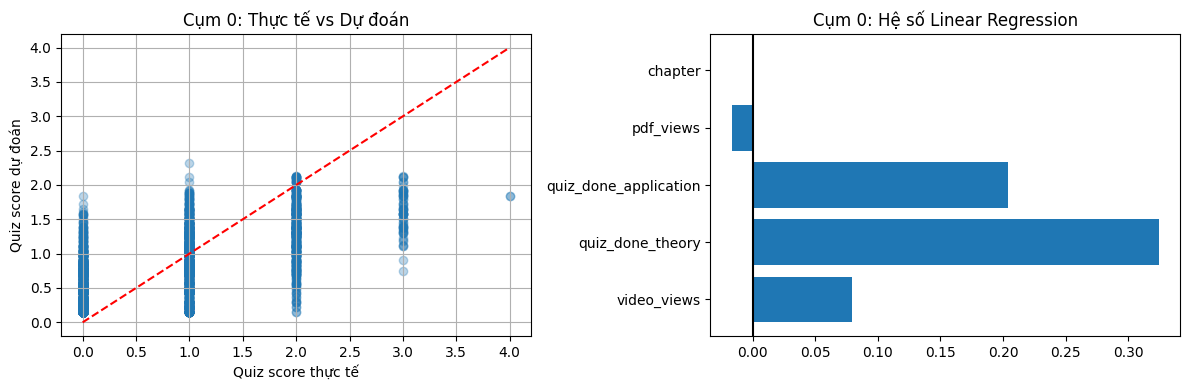


=== C·ª•m 1 ‚Äì cluster1.csv ===
   MSE = 0.4194


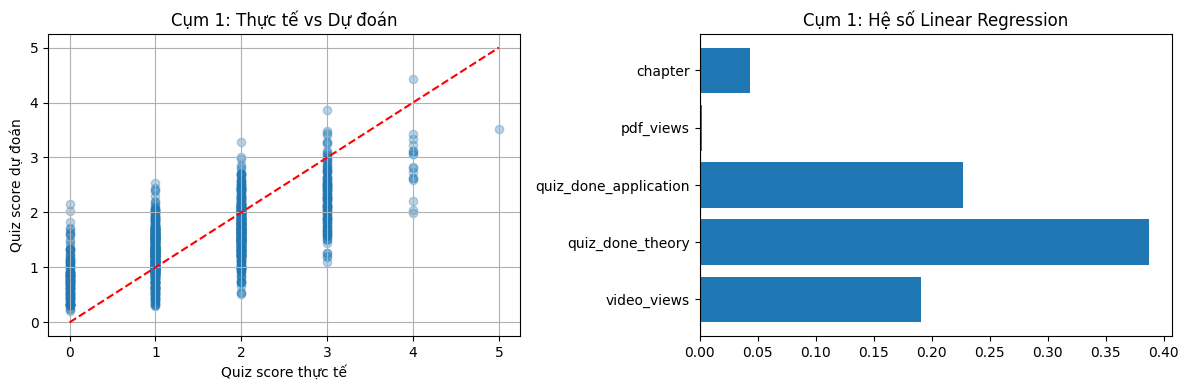


=== C·ª•m 2 ‚Äì cluster2.csv ===
   MSE = 0.4722


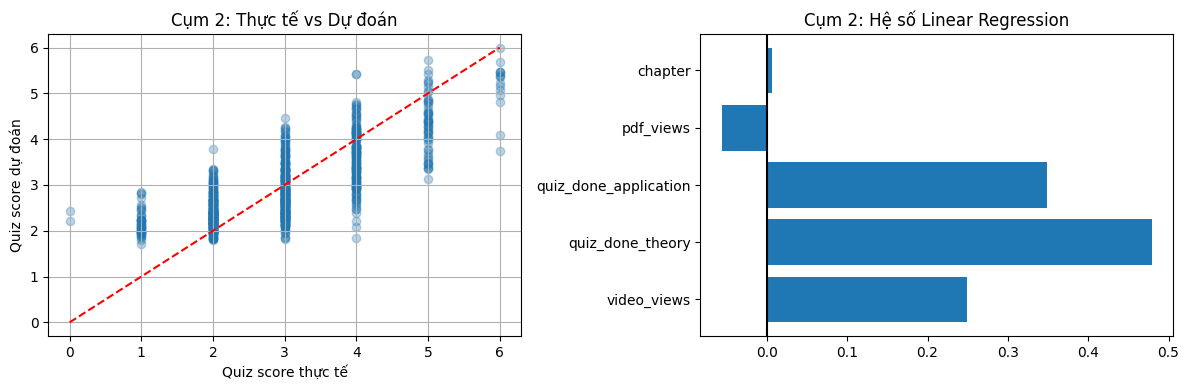

In [28]:
# --------- 1. C·∫•u h√¨nh chung ----------
data_dir   = pathlib.Path("data")          # th∆∞ m·ª•c ch·ª©a cluster*.csv
clusters   = [0, 1, 2]                     # ID c·ª•m
features   = ['video_views', 'quiz_done_theory',
              'quiz_done_application', 'pdf_views', 'chapter']

# --------- 2. V√≤ng l·∫∑p qua t·ª´ng c·ª•m ----------
for cid in clusters:
    csv_path = data_dir / f"cluster{cid}.csv"
    print(f"\n=== C·ª•m {cid} ‚Äì {csv_path.name} ===")

    # 2.1 ƒê·ªçc d·ªØ li·ªáu
    df = pd.read_csv(csv_path)
    X, y = df[features], df['quiz_score']

    # 2.2 Scale + hu·∫•n luy·ªán
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    model = LinearRegression().fit(X_scaled, y)
    mse   = mean_squared_error(y, model.predict(X_scaled))
    print(f"   MSE = {mse:.4f}")

    # 2.3 L∆∞u model & scaler
    joblib.dump(model,  f'reward_model_cluster{cid}.joblib')
    joblib.dump(scaler, f'reward_scaler_cluster{cid}.joblib')

    # 2.4 V·∫Ω bi·ªÉu ƒë·ªì (2 h√¨nh c·∫°nh nhau)
    y_pred = model.predict(X_scaled)
    plt.figure(figsize=(12,4))

    # A) Scatter th·ª±c t·∫ø vs d·ª± ƒëo√°n
    plt.subplot(1,2,1)
    plt.scatter(y, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Quiz score th·ª±c t·∫ø")
    plt.ylabel("Quiz score d·ª± ƒëo√°n")
    plt.title(f"C·ª•m {cid}: Th·ª±c t·∫ø vs D·ª± ƒëo√°n")
    plt.grid(True)

    # B) Bi·ªÉu ƒë·ªì h·ªá s·ªë
    plt.subplot(1,2,2)
    coef = model.coef_
    plt.barh(features, coef)
    plt.axvline(0, color='k')
    plt.title(f"C·ª•m {cid}: H·ªá s·ªë Linear Regression")
    plt.tight_layout()
    plt.show()

### Hu·∫•n luy·ªán model Linear Regression tr√™n to√†n b·ªô d·ªØ li·ªáu

MSE = 0.40260407567298073


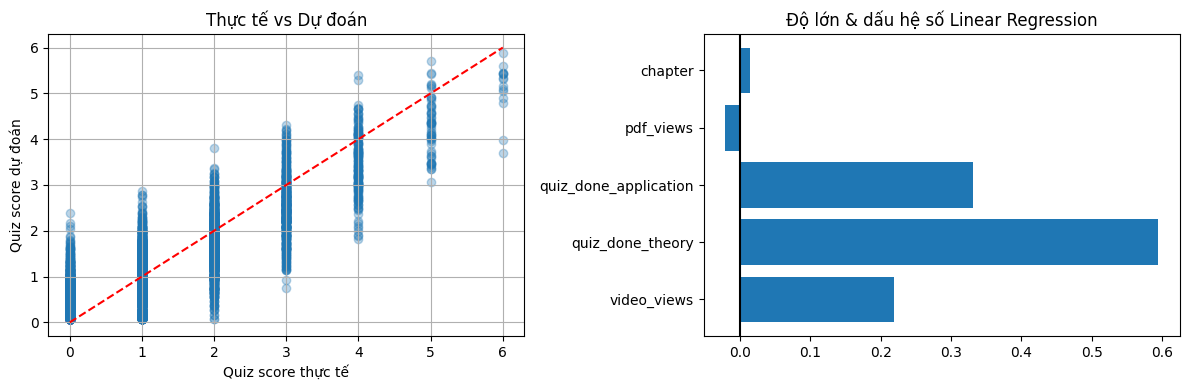

In [ ]:
# 1) ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("data/smart_data_full.csv")

# 2) Ch·ªçn input & output
features = ['video_views', 'quiz_done_theory',
            'quiz_done_application', 'pdf_views', 'chapter']
X        = df[features]
y        = df['quiz_score']

# 3) Scale + hu·∫•n luy·ªán
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression().fit(X_scaled, y)
print("MSE =", mean_squared_error(y, model.predict(X_scaled)))

# 4) L∆∞u ƒë·ªÉ t√°i d√πng sau
joblib.dump(model,  'reward_model.joblib')
joblib.dump(scaler, 'reward_scaler.joblib')

# 5) ------------ V·∫º BI·ªÇU ƒê·ªí ------------
# A. Scatter: y_th·∫≠t vs y_pred
y_pred = model.predict(X_scaled)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Quiz score th·ª±c t·∫ø")
plt.ylabel("Quiz score d·ª± ƒëo√°n")
plt.title("Th·ª±c t·∫ø vs D·ª± ƒëo√°n")
plt.grid(True)

# B. Bar chart: h·ªá s·ªë
plt.subplot(1,2,2)
coef = model.coef_
plt.barh(features, coef)
plt.axvline(0, color='k')
plt.title("ƒê·ªô l·ªõn & d·∫•u h·ªá s·ªë Linear Regression")
plt.tight_layout()
plt.show()

### In ra ph∆∞∆°ng tr√¨nh linear to√†n b·ªô d·ªØ li·ªáu

In [23]:
# ----- 1. Load model & scaler -----
model  = joblib.load('reward_model.joblib')
scaler = joblib.load('reward_scaler.joblib')

feature_names = ['video_views', 'quiz_done_theory',
                 'quiz_done_application', 'pdf_views', 'chapter']

w      = model.coef_            # h·ªá s·ªë tr√™n bi·∫øn ƒë√£ chu·∫©n h√≥a
b0     = model.intercept_
mu     = scaler.mean_           # vector mean
sig    = scaler.scale_          # vector std

# ----- 2. T√≠nh h·ªá s·ªë ·ªü THANG G·ªêC -----
raw_coef = w / sig
raw_intercept = b0 - (w * mu / sig).sum()

# ----- 3. In c√¥ng th·ª©c -----
print("‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√° (d√πng trong predict):")
print(f"  yÃÇ = {b0:.4f} " + " + ".join([f"{wi:.4f}¬∑z_{col}" 
                                        for wi, col in zip(w, feature_names)]))

print("\n‚òÖ Ph∆∞∆°ng tr√¨nh THANG G·ªêC (d·ªÖ ƒë·ªçc):")
print(f"  yÃÇ = {raw_intercept:.4f}"
      + " + ".join([f" {ci:+.4f}¬∑{col}"
                    for ci, col in zip(raw_coef, feature_names)]))

‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√° (d√πng trong predict):
  yÃÇ = 1.3184 0.2194¬∑z_video_views + 0.5943¬∑z_quiz_done_theory + 0.3316¬∑z_quiz_done_application + -0.0204¬∑z_pdf_views + 0.0148¬∑z_chapter

‚òÖ Ph∆∞∆°ng tr√¨nh THANG G·ªêC (d·ªÖ ƒë·ªçc):
  yÃÇ = 0.0549 +0.0947¬∑video_views +  +0.3011¬∑quiz_done_theory +  +0.2694¬∑quiz_done_application +  -0.0137¬∑pdf_views +  +0.0089¬∑chapter


### In ra ph∆∞∆°ng tr√¨nh linear tr√™n t·ª´ng c·ª•m c·ªß th·ªÉ

In [29]:
feature_names = ['video_views', 'quiz_done_theory',
                 'quiz_done_application', 'pdf_views', 'chapter']

for cid in [0, 1, 2]:
    # ----- 1. N·∫°p model & scaler c·ªßa t·ª´ng c·ª•m -----
    model_path  = f'reward_model_cluster{cid}.joblib'
    scaler_path = f'reward_scaler_cluster{cid}.joblib'
    model  = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    w  = model.coef_          # h·ªá s·ªë tr√™n bi·∫øn chu·∫©n ho√°
    b0 = model.intercept_
    mu = scaler.mean_         # mean c·ªßa t·ª´ng feature
    sig= scaler.scale_        # std  c·ªßa t·ª´ng feature

    # ----- 2. Chuy·ªÉn v·ªÅ thang g·ªëc -----
    raw_coef      = w / sig
    raw_intercept = b0 - (w * mu / sig).sum()

    # ----- 3. In ph∆∞∆°ng tr√¨nh -----
    print(f"\n================ C·ª•m {cid} ================")
    print("‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√°:")
    print(f"  yÃÇ = {b0:.4f} " +
          " + ".join(f"{wi:.4f}¬∑z_{col}"
                     for wi, col in zip(w, feature_names)))

    print("‚òÖ Ph∆∞∆°ng tr√¨nh THANG G·ªêC:")
    print(f"  yÃÇ = {raw_intercept:.4f}" +
          "".join(f" {ci:+.4f}¬∑{col}"
                  for ci, col in zip(raw_coef, feature_names)))


================ C·ª•m 0 ================
‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√°:
  yÃÇ = 0.7937 0.0797¬∑z_video_views + 0.3244¬∑z_quiz_done_theory + 0.2037¬∑z_quiz_done_application + -0.0169¬∑z_pdf_views + 0.0011¬∑z_chapter
‚òÖ Ph∆∞∆°ng tr√¨nh THANG G·ªêC:
  yÃÇ = 0.1541 +0.0707¬∑video_views +0.2780¬∑quiz_done_theory +0.2597¬∑quiz_done_application -0.0233¬∑pdf_views +0.0007¬∑chapter

================ C·ª•m 1 ================
‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√°:
  yÃÇ = 1.5013 0.1907¬∑z_video_views + 0.3876¬∑z_quiz_done_theory + 0.2269¬∑z_quiz_done_application + 0.0020¬∑z_pdf_views + 0.0431¬∑z_chapter
‚òÖ Ph∆∞∆°ng tr√¨nh THANG G·ªêC:
  yÃÇ = -0.1322 +0.1049¬∑video_views +0.3133¬∑quiz_done_theory +0.2635¬∑quiz_done_application +0.0012¬∑pdf_views +0.0260¬∑chapter

================ C·ª•m 2 ================
‚òÖ Ph∆∞∆°ng tr√¨nh chu·∫©n ho√°:
  yÃÇ = 2.9403 0.2493¬∑z_video_views + 0.4792¬∑z_quiz_done_theory + 0.3490¬∑z_quiz_done_application + -0.0560¬∑z_pdf_views + 0.0064¬∑z_chapter
‚òÖ Ph∆∞∆°ng tr√

### H√†m d·ª± ƒëo√°n ƒëi·ªÉm s·ªë cho h√†nh ƒë·ªông m·ªõi

In [16]:
def predict_score_for_action(action_vector):
    """
    action_vector: list g·ªìm 5 s·ªë t∆∞∆°ng ·ª©ng v·ªõi:
    [video_views, quiz_done_theory, quiz_done_application, pdf_views, chapter]
    """
    model = joblib.load('reward_model.joblib')
    scaler = joblib.load('reward_scaler.joblib')

    feature_names = ['video_views', 'quiz_done_theory', 'quiz_done_application', 'pdf_views', 'chapter']
    action_df = pd.DataFrame([action_vector], columns=feature_names)

    action_scaled = scaler.transform(action_df)
    predicted_score = model.predict(action_scaled)[0]
    return predicted_score

In [30]:
def predict_score_by_cluster(action_vector, cluster_id):
    model  = joblib.load(f'reward_model_cluster{cluster_id}.joblib')
    scaler = joblib.load(f'reward_scaler_cluster{cluster_id}.joblib')

    action_df     = pd.DataFrame([action_vector], columns=feature_names)
    action_scaled = scaler.transform(action_df)
    return model.predict(action_scaled)[0]

### V√≠ d·ª• s·ª≠ d·ª•ng:

In [40]:

# train_reward_model()  # ch·ªâ c·∫ßn ch·∫°y 1 l·∫ßn ƒë·ªÉ hu·∫•n luy·ªán
# D·ª± ƒëo√°n ƒëi·ªÉm s·ªë cho 1 h√†nh ƒë·ªông gi·∫£ ƒë·ªãnh
action = [5, 8, 6, 4, 6]  # Xem 5 video, 8 quiz l√Ω thuy·∫øt, 6 quiz ·ª©ng d·ª•ng, 4 PDF, ch∆∞∆°ng 6 # ‚ÄúActive learner‚Äù
score = predict_score_for_action(action)
print(f"üéØ D·ª± ƒëo√°n ƒëi·ªÉm s·ªë cho h√†nh ƒë·ªông t·ªïng: {score:.2f}")               

score = predict_score_by_cluster(action, 0)
print(f"üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 0: {score:.2f}")

score = predict_score_by_cluster(action, 1)
print(f"üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 1: {score:.2f}")

score = predict_score_by_cluster(action, 2)
print(f"üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 2: {score:.2f}")

üéØ D·ª± ƒëo√°n ƒëi·ªÉm s·ªë cho h√†nh ƒë·ªông t·ªïng: 4.55
üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 0: 4.20
üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 1: 4.64
üéØ D·ª± ƒëo√°n ƒëi·ªÉm cho c·ª•m 2: 4.52
